In [7]:

import pandas 
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

train_data = pandas.read_csv("insurance_train.csv")

test_data = pandas.read_csv("insurance_test.csv")
#print(train_data.head(3))
#drop id
train_data.drop('id',axis=1,inplace=True)
test_data.drop('id',axis=1,inplace=True)
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
print(train_data.head(5))
print(train_data.shape)


  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    B    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    A    A    A    A    A    B     B     A     A     A     A   
2    A    B    A    A    B    A    A    A    B     B     B     B     B     A   
3    B    B    A    B    A    A    A    A    B     A     A     A     A     A   
4    A    B    A    B    A    A    A    A    B     B     A     B     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     B     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     B     A     A     A   
4     A     A     A     A     A     A     A     A     B     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 

In [8]:
#We have 188318 data samples and 130 catagorical and continious data, 
#130 features (131-1(loss is the value we are wanting to predict))

#statistical analysis of data for feature selection

print(train_data.describe())


#skewness of the data

print(train_data.skew())

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [0]:
#we can normalize the loss value
#loss has the highest skew (>3)

#for splitting the data into categorical and continiouus features.
split = 116 

#Now, matrix of continious features
data=train_data.iloc[:,split:] 
cols=data.columns 

#define cols and rows
no_of_cols = 2
no_of_rows = 7

#size of the continious features
size = 15

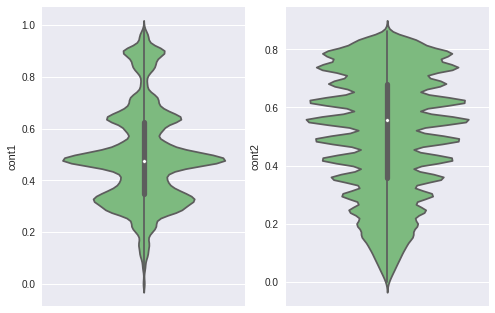

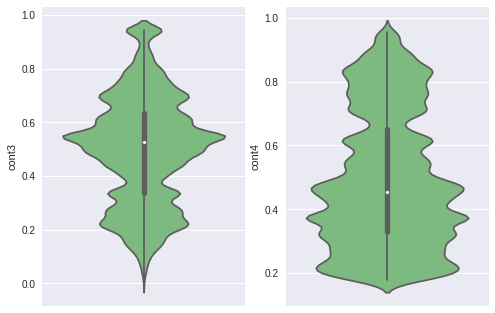

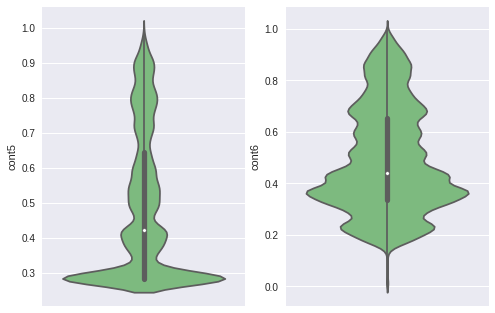

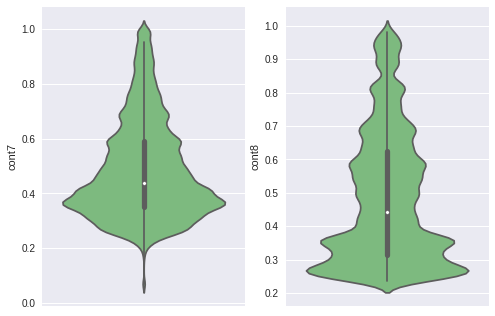

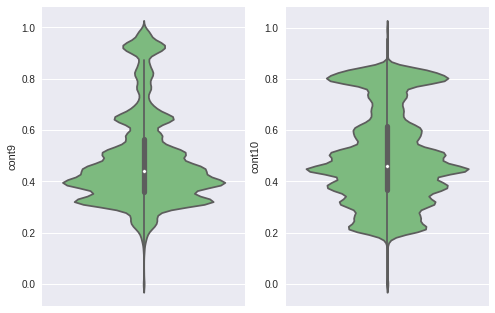

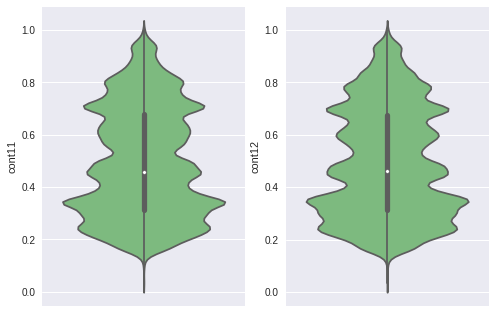

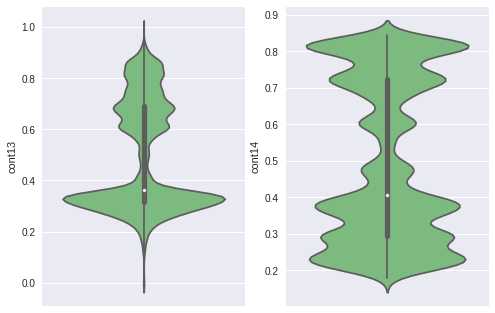

In [0]:
#Since no attribute is missing from the continious column as the command print(train_data.describe()), all the rows can be used
#No negetive values are present . The above command does not display the statistics for catagorical data.

import warnings
warnings.filterwarnings('ignore')


#print("the data with cont features is", data.shape)
for i in range(no_of_rows):
    fg,ax = plt.subplots(nrows=1,ncols=no_of_cols)
    for j in range(no_of_cols):
        #sns.set_facecolor('red')
        sns.violinplot(y=cols[i*no_of_cols+j], data=train_data, ax=ax[j], palette="Greens")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


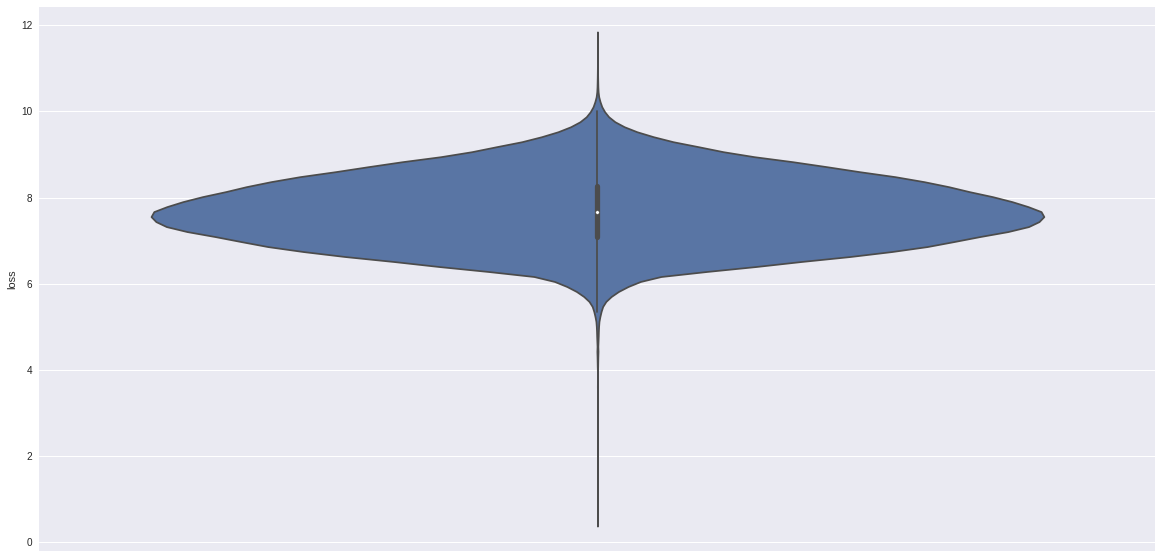

In [10]:

#correcting the skew for loss distribution
train_data["loss"] = numpy.log1p(train_data["loss"])
sns.violinplot(data=train_data,y="loss")  
plt.show()




correlation between cont1 , cont6 is 0.76
correlation between cont1 , cont9 is 0.93
correlation between cont1 , cont10 is 0.81
correlation between cont1 , cont11 is 0.60
correlation between cont1 , cont12 is 0.61
correlation between cont1 , cont13 is 0.53
correlation between cont4 , cont8 is 0.53
correlation between cont6 , cont7 is 0.66
correlation between cont6 , cont9 is 0.80
correlation between cont6 , cont10 is 0.88
correlation between cont6 , cont11 is 0.77
correlation between cont6 , cont12 is 0.79
correlation between cont6 , cont13 is 0.82
correlation between cont7 , cont11 is 0.75
correlation between cont7 , cont12 is 0.74
correlation between cont9 , cont10 is 0.79
correlation between cont9 , cont11 is 0.61
correlation between cont9 , cont12 is 0.63
correlation between cont9 , cont13 is 0.64
correlation between cont10 , cont11 is 0.70
correlation between cont10 , cont12 is 0.71
correlation between cont10 , cont13 is 0.71
correlation between cont11 , cont12 is 0.99


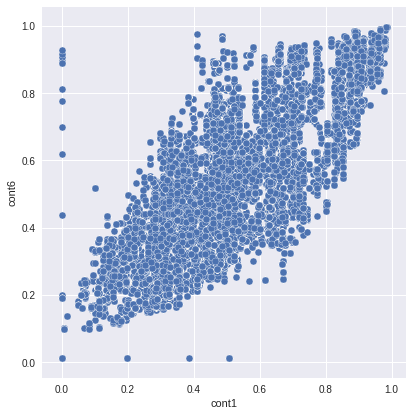

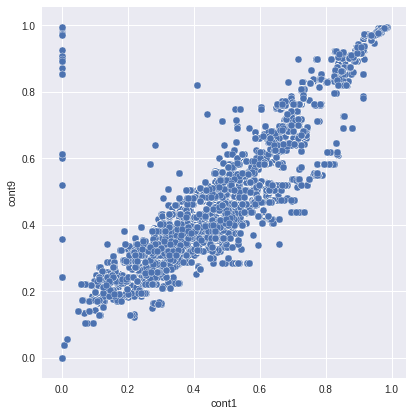

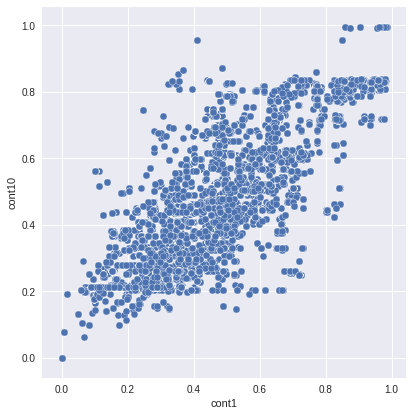

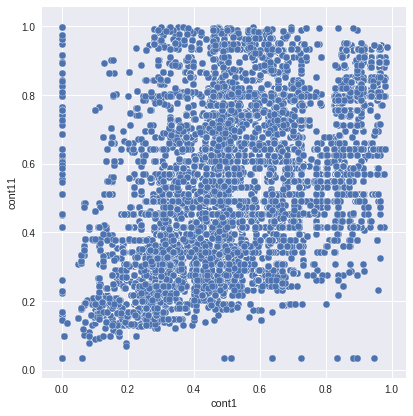

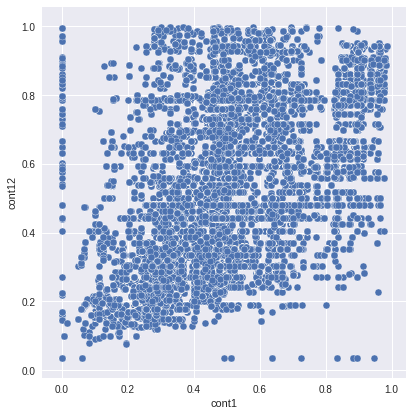

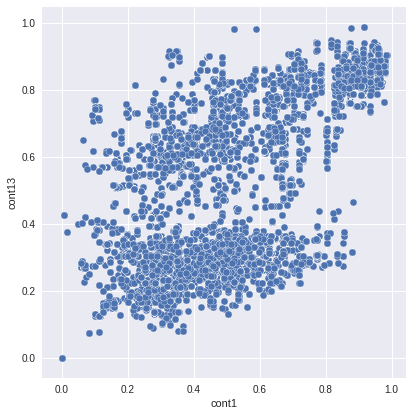

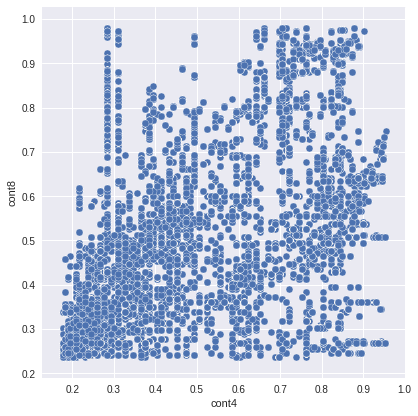

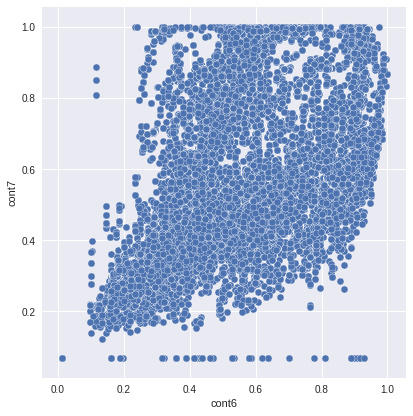

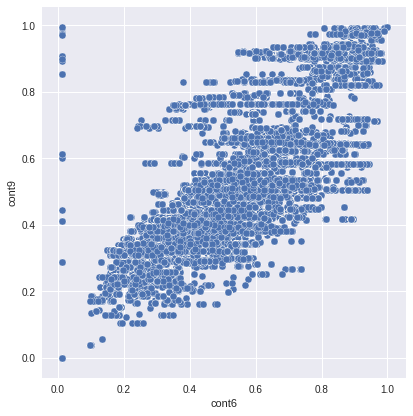

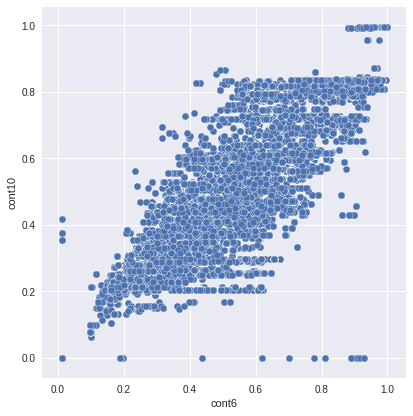

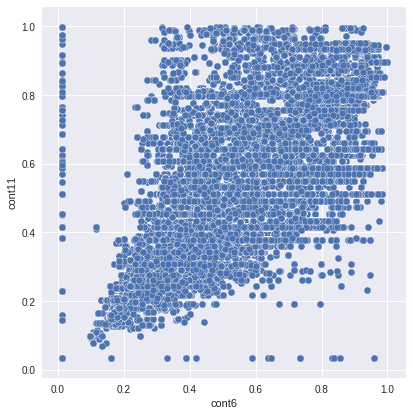

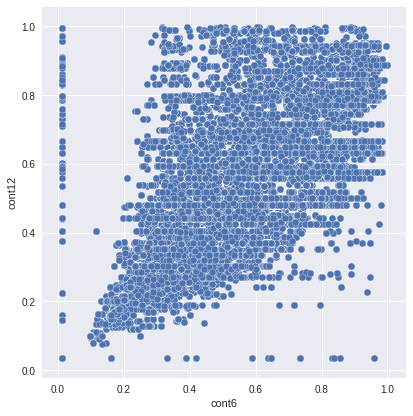

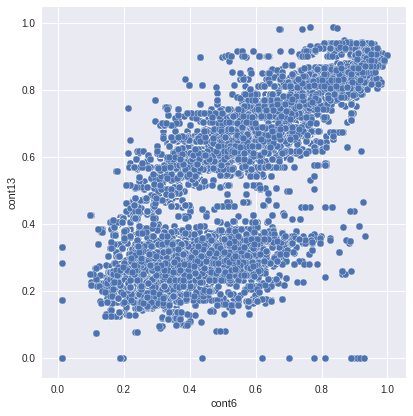

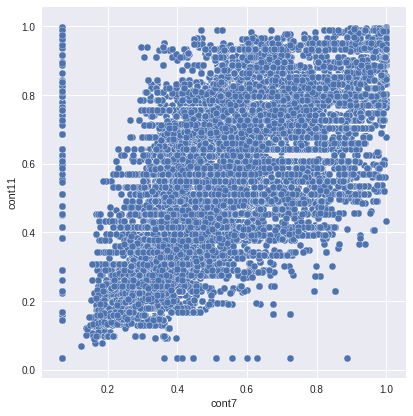

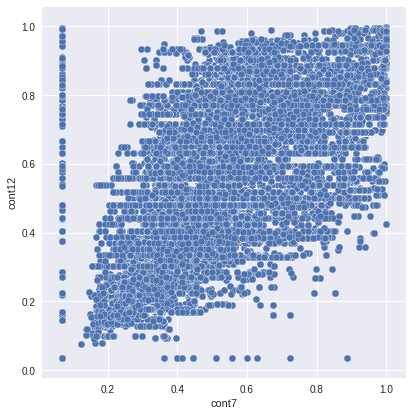

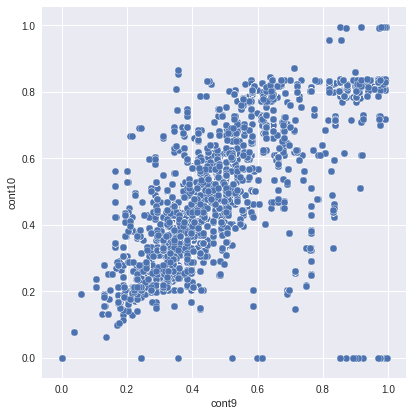

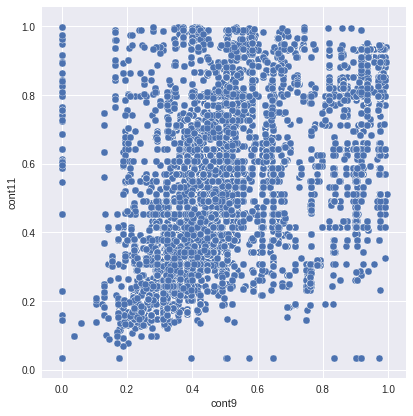

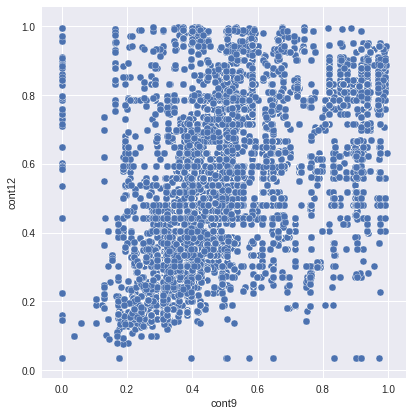

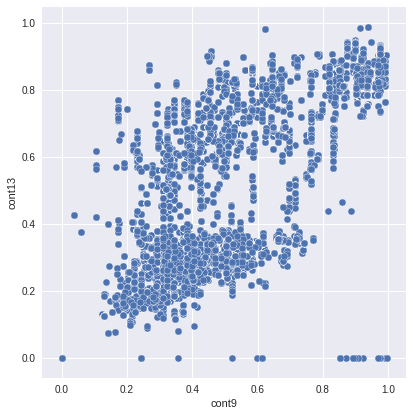

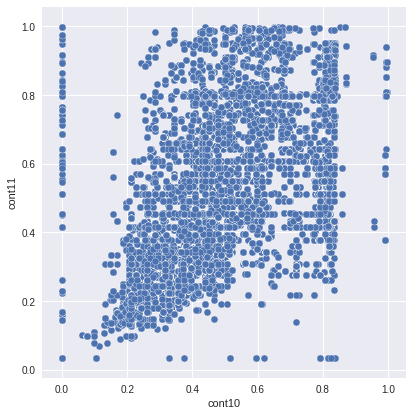

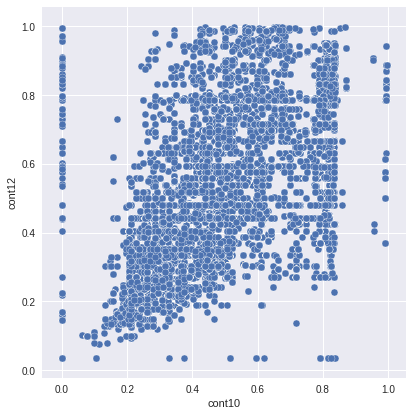

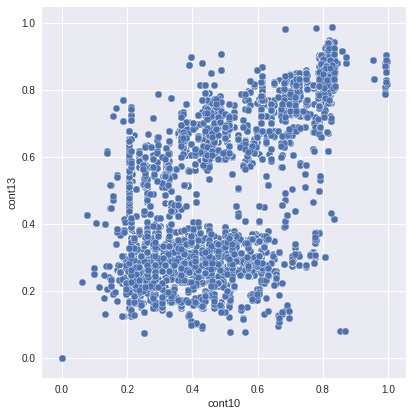

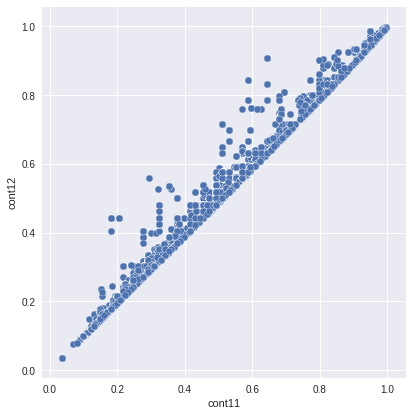

In [0]:
#DATA INTERACTION. 
#Correlation tells realtionship between 2 attributes . We check the continious data 


#calculates correlation between every pai
corr_train_data = data.corr()

#print(corr_train_data)
#collecting correlating above threshold
t = 0.500
corr_above_threshold = []

#threshold 

        
        
        
for i in range(0,size): 
    for j in range(i+1,size): 
        if (corr_train_data.iloc[i,j] >= t and corr_train_data.iloc[i,j] < 1) :
            corr_above_threshold.append([corr_train_data.iloc[i,j],i,j]) #store correlation and columns index

#Print correlations and column names
for v,i,j in corr_above_threshold:
    print ("correlation between %s , %s is %.2f" % (cols[i],cols[j],v))
    
    
    
    
# Scatter plot of only the highly correlated pairs
for v,i,j in corr_above_threshold:
    sns.pairplot(train_data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()





In [11]:
print(train_data.shape)
cols = train_data.columns

#29*4
no_of_cols =4 
no_of_rows=29


(188318, 131)


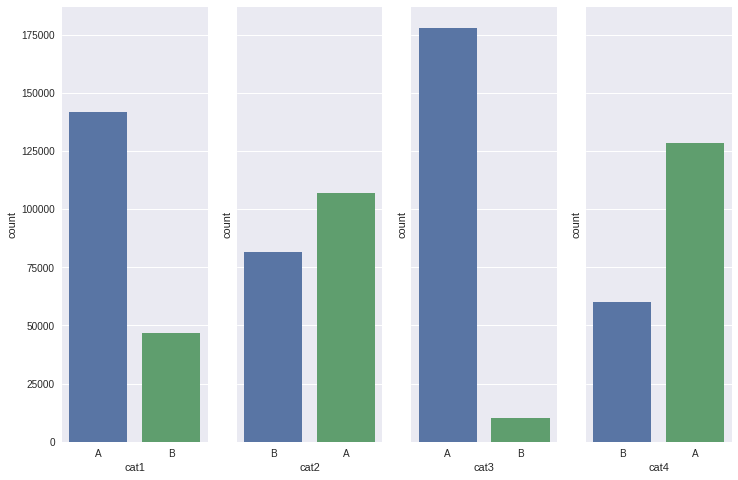

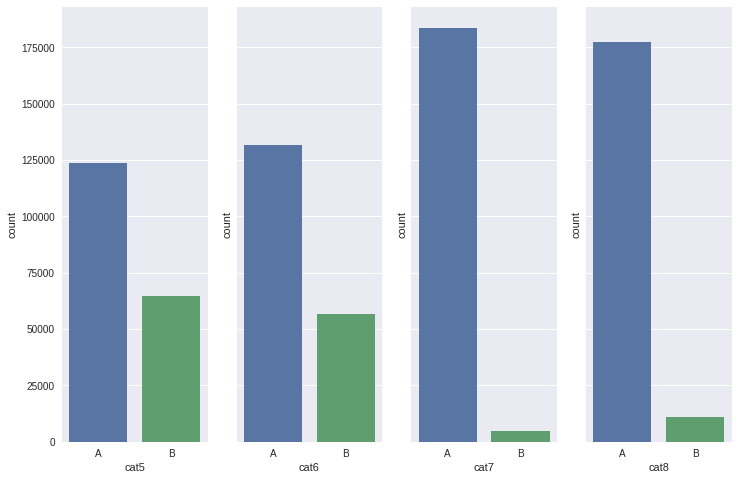

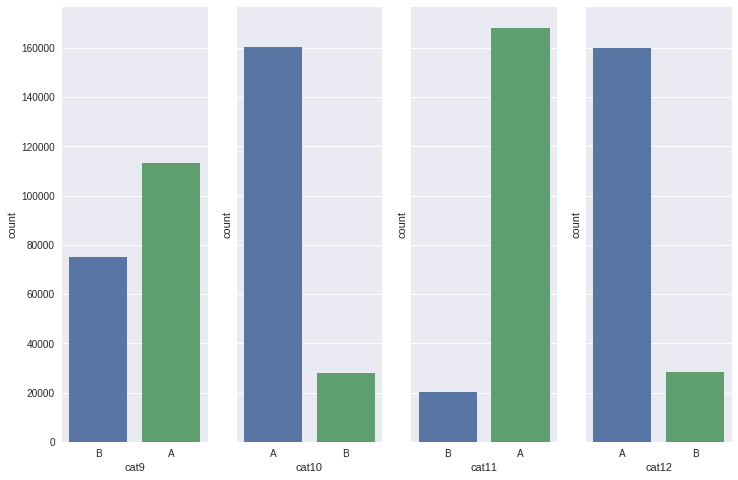

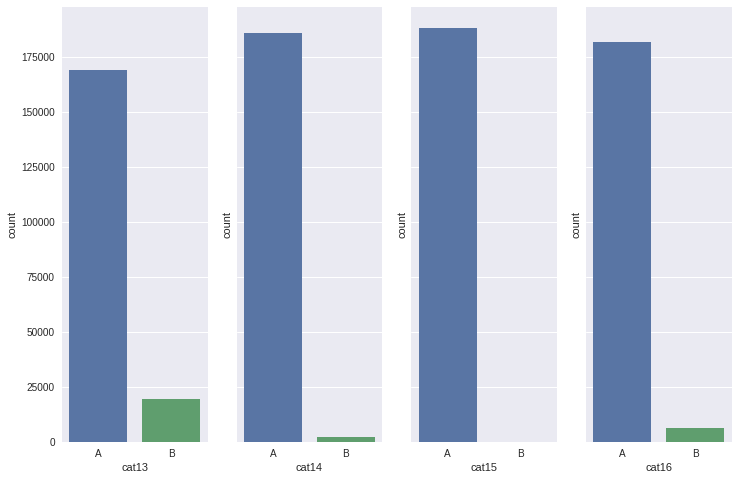

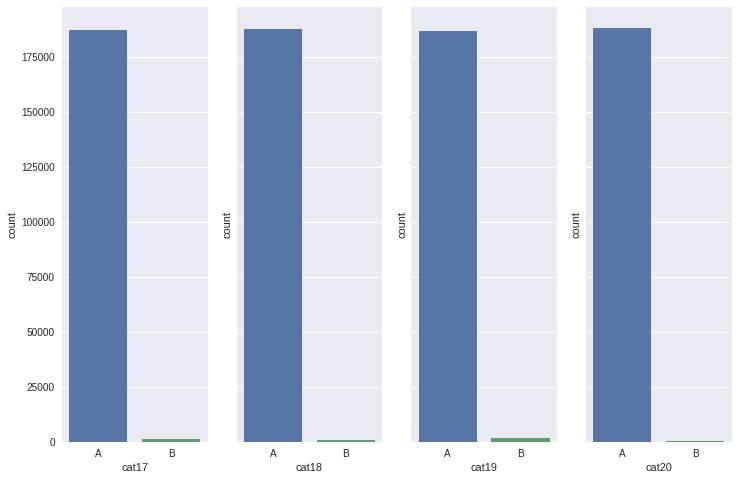

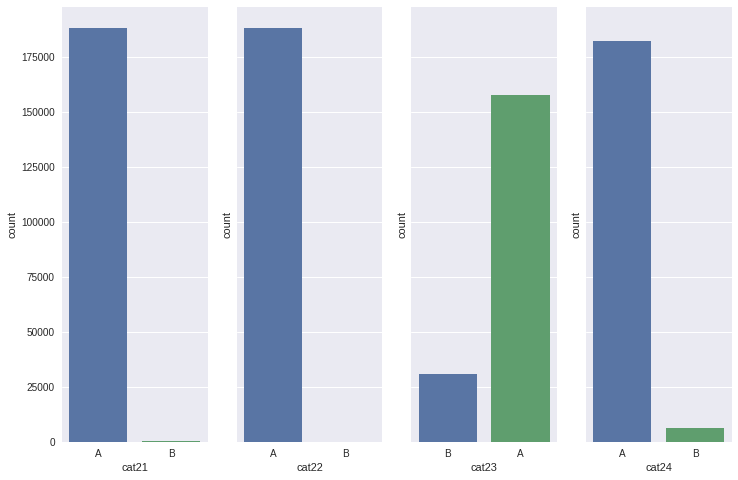

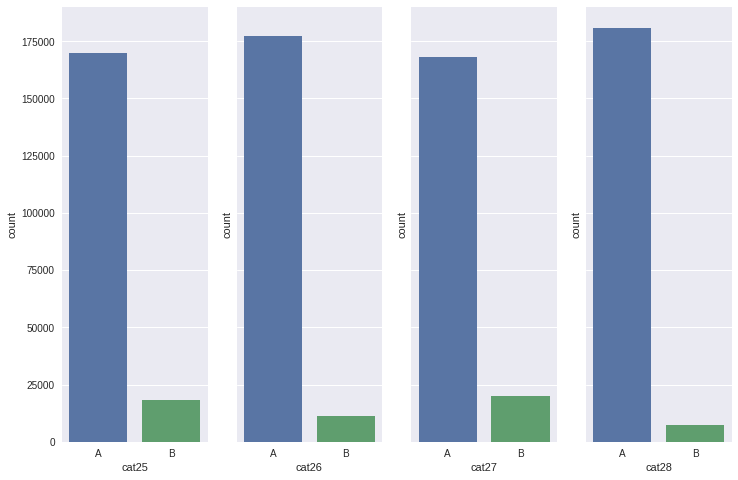

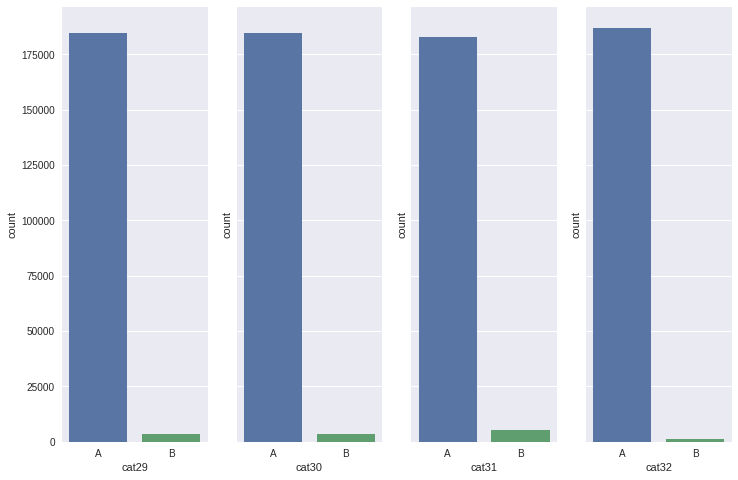

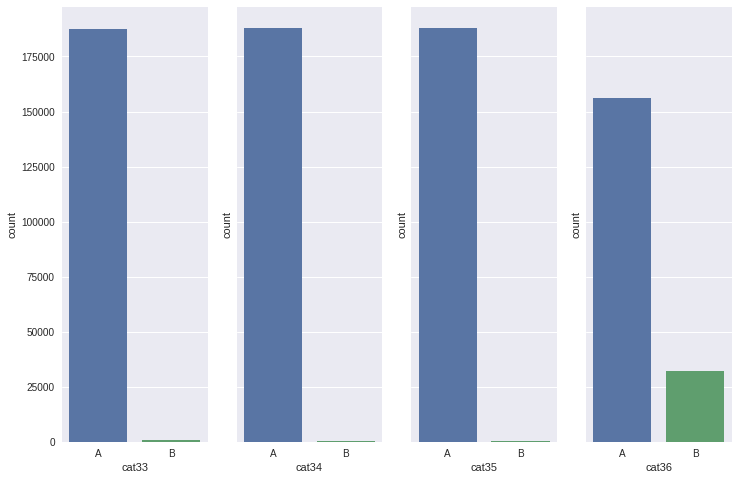

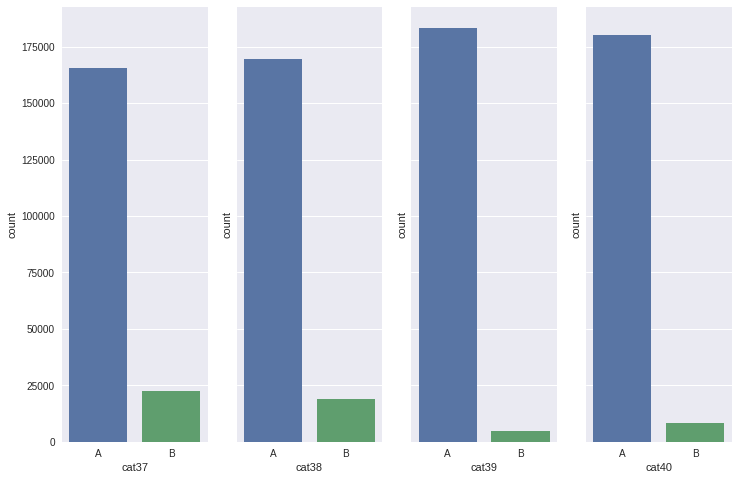

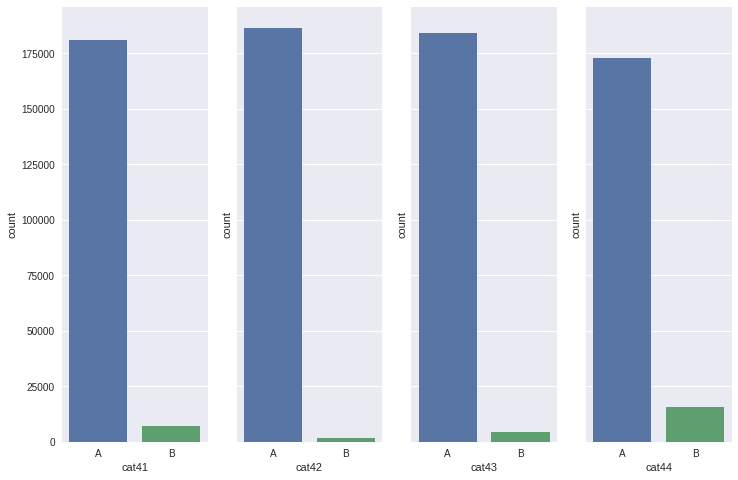

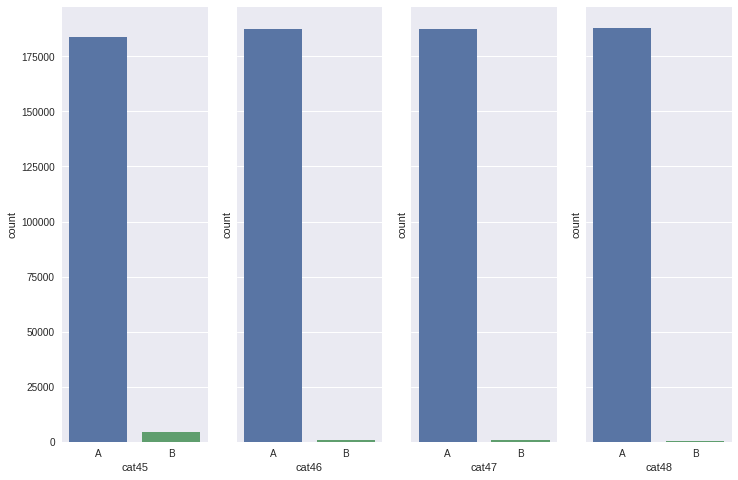

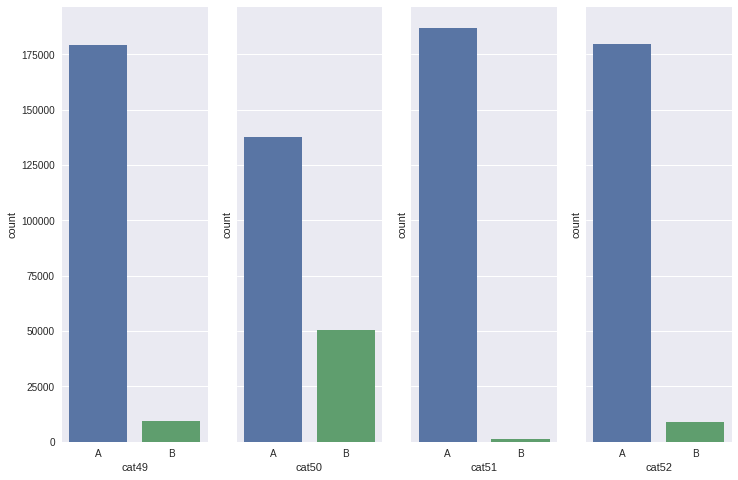

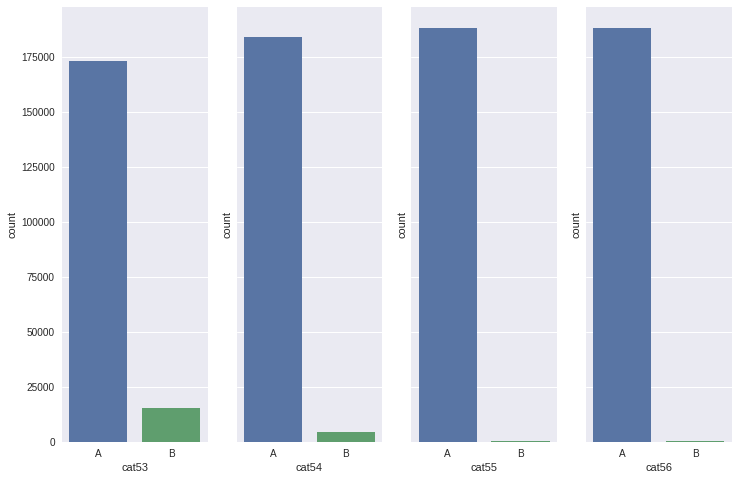

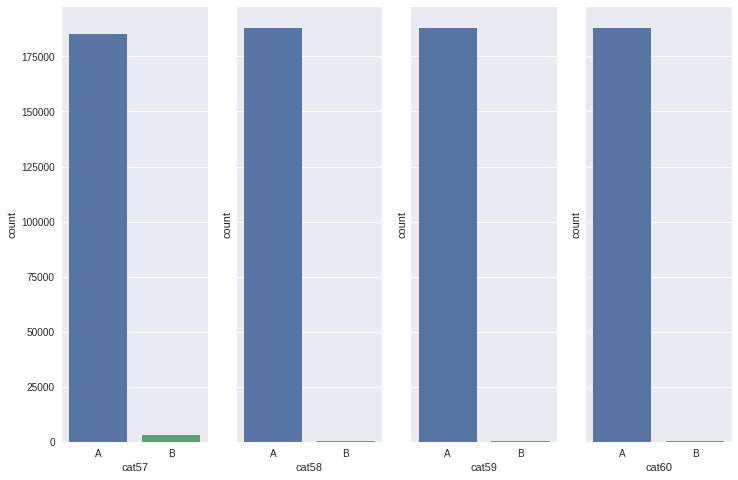

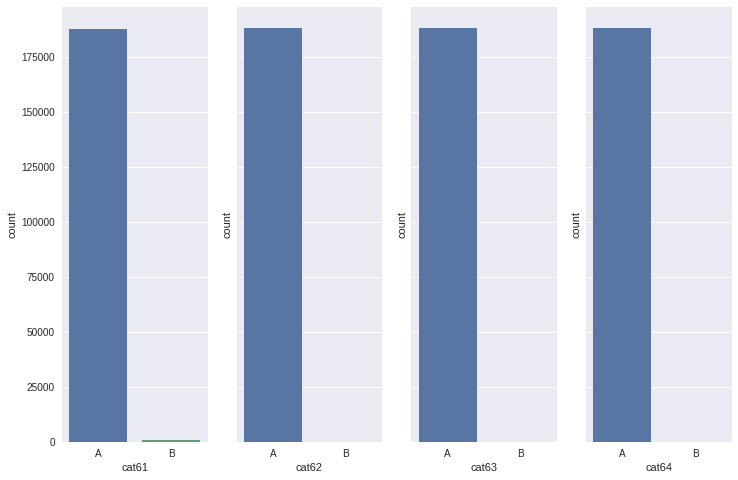

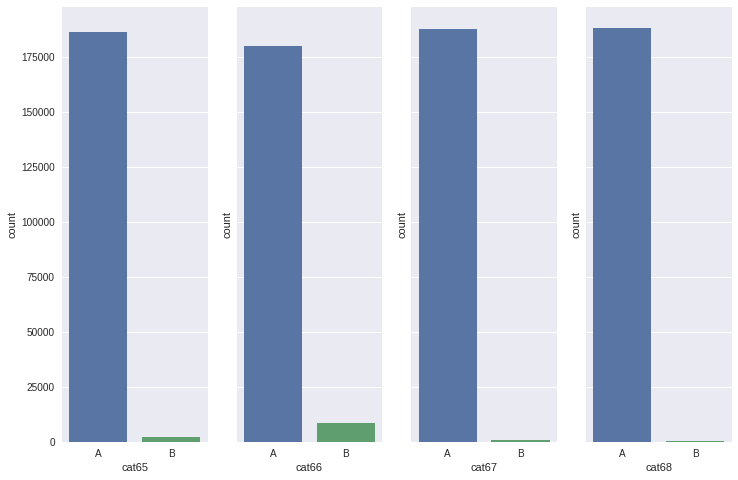

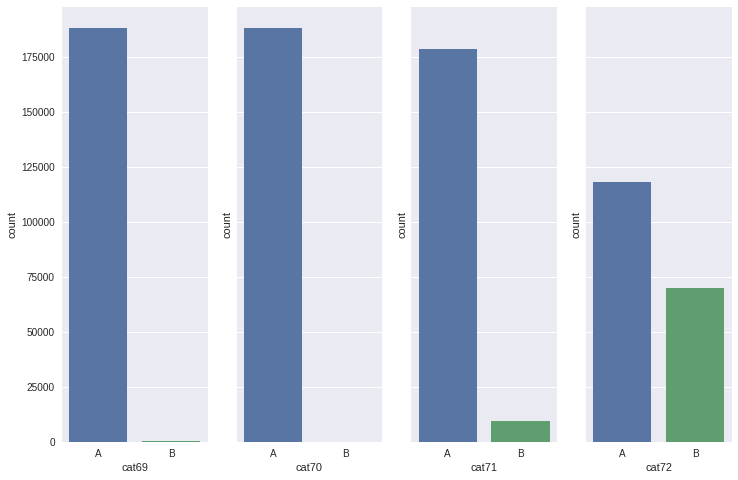

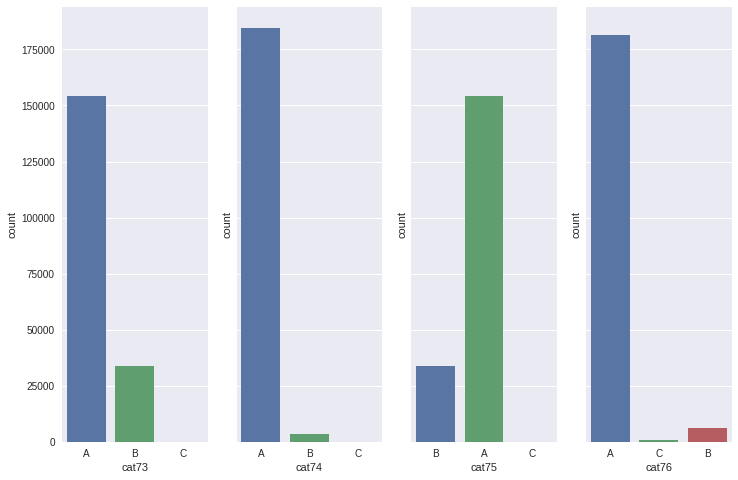

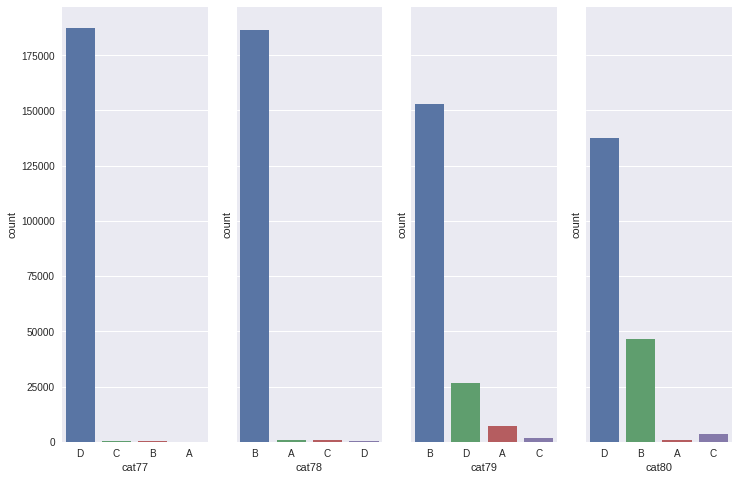

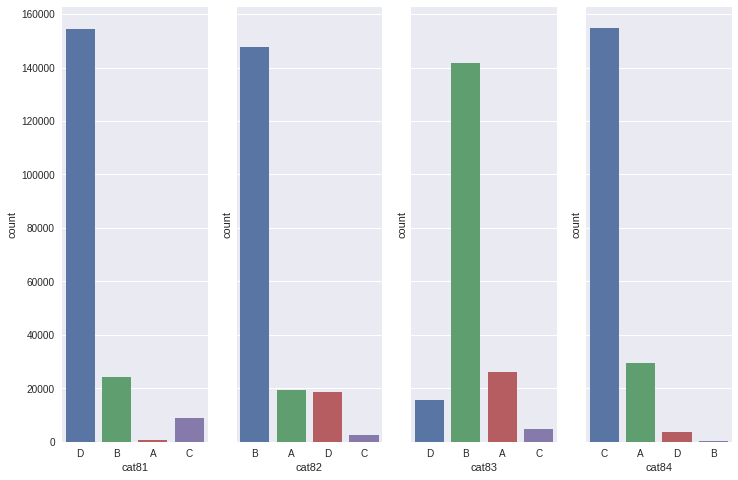

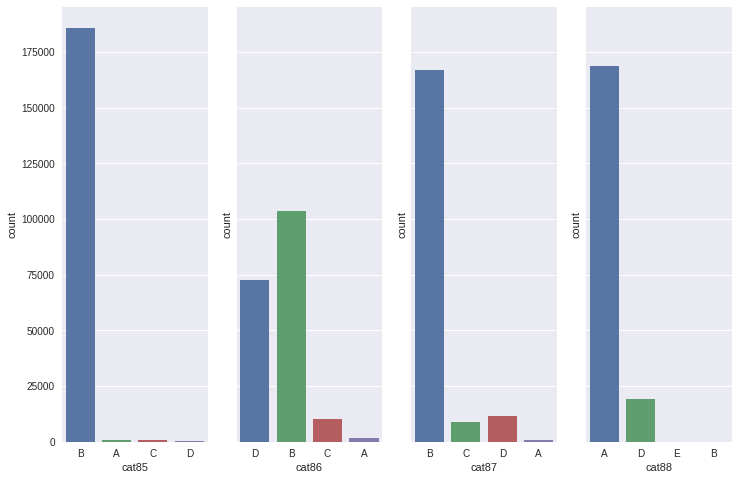

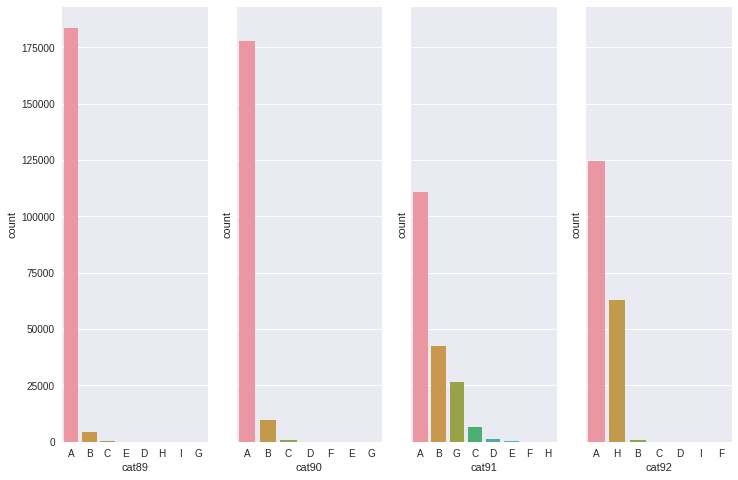

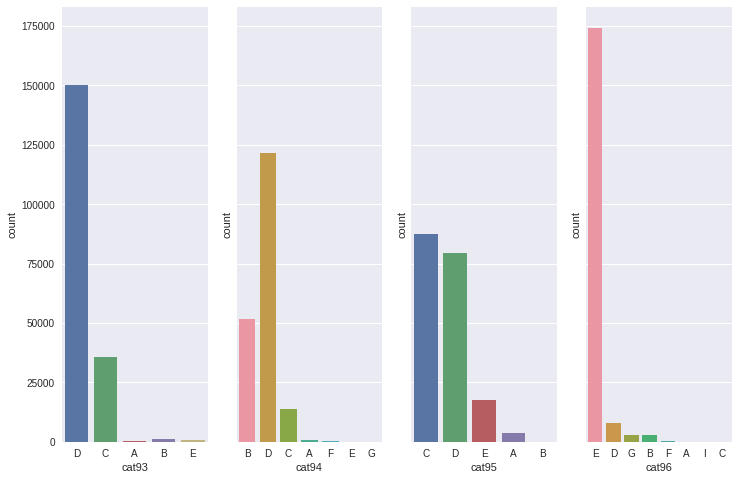

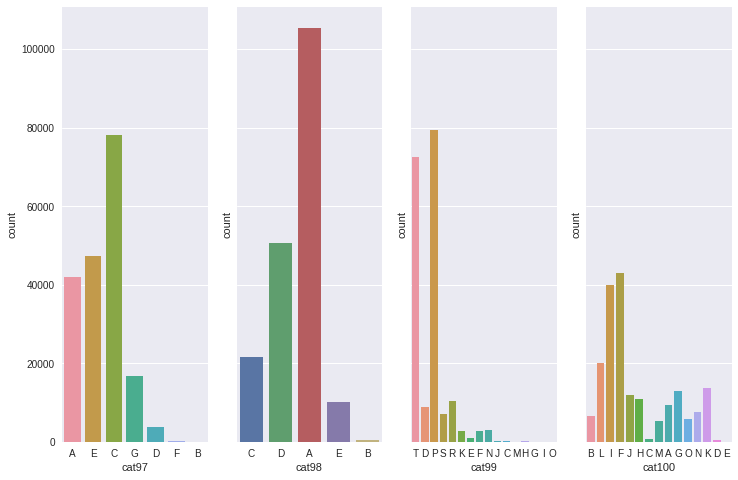

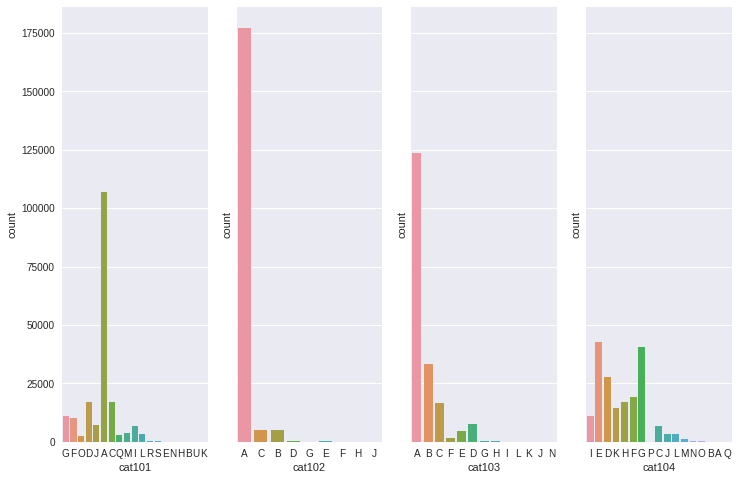

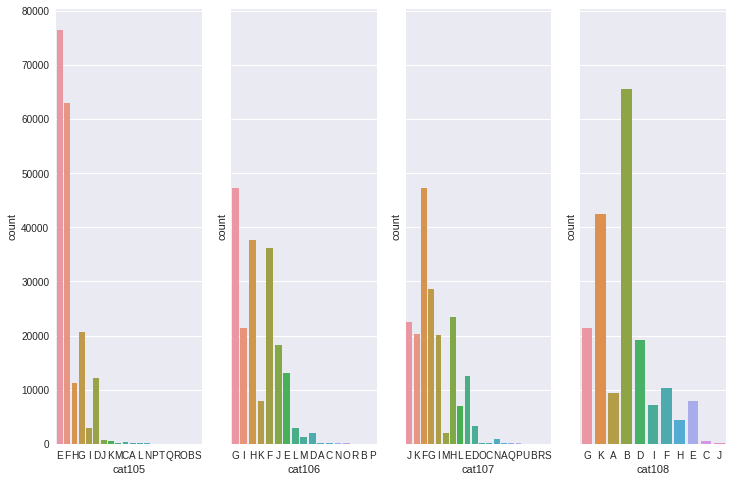

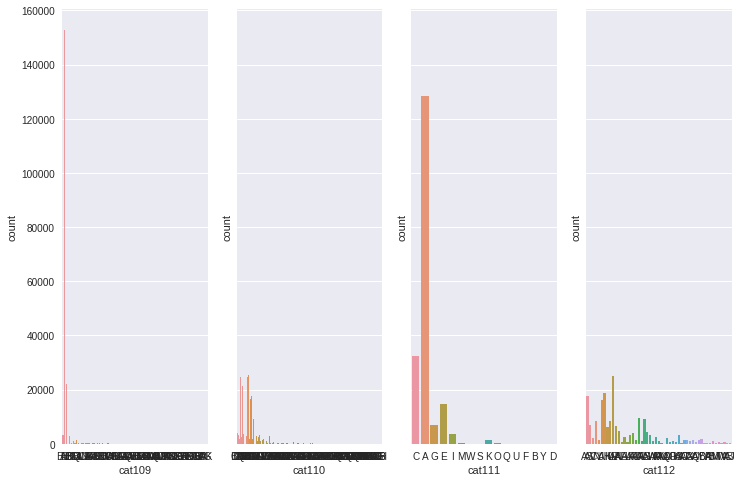

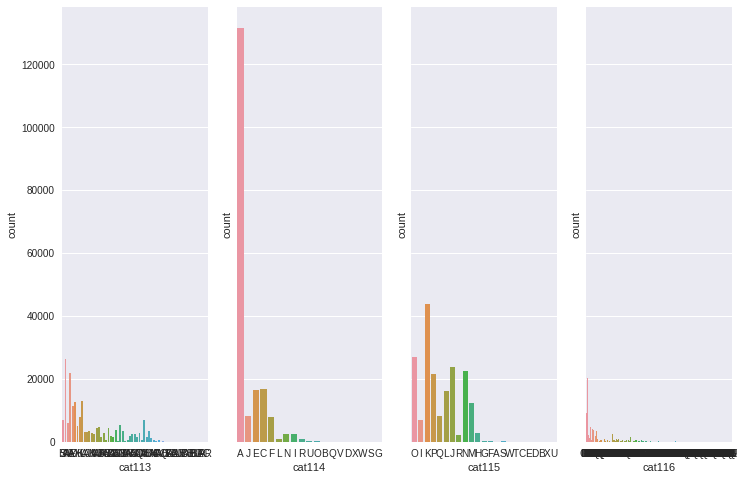

In [0]:

for i in range(no_of_rows):
    fg,ax = plt.subplots(nrows=1,ncols=no_of_cols,sharey=True,figsize=(12, 8))
    for j in range(no_of_cols):
#         train_data.plot(kind='hist')
#         train_data['blue'].value_counts().plot(kind='bar')
#        sns.boxplot(x=cols[i*no_of_cols+j], data=train_data, ax=ax[j])
          sns.countplot(x=cols[i*no_of_cols+j], data=train_data, ax=ax[j])
        
        



In [12]:
#hot encoding

test_data = pandas.read_csv("insurance_test.csv")

# print(test_data.shape)
# print(train_data.shape)
#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = train_data[cols[i]].unique()
    test = test_data[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

#print(train.shape)
#print(test.shape)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    
    feature = label_encoder.transform(train_data.iloc[:,i])
    feature = feature.reshape(train_data.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)


encoded_cats = numpy.column_stack(cats)
print(encoded_cats.shape)

#combine all the data with encoded values
dataset_encoded = numpy.concatenate((encoded_cats,train_data.iloc[:,split:].values),axis=1)
print(dataset_encoded.shape)
#print("The encoded data set is", dataset_encoded)

(188318, 1176)
(188318, 1191)


In [0]:

#get the number of rows and columns
r, c = dataset_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

# print(X.shape)
# print(Y.shape)

#Split the data into chunks

#Validation chunk size (let us take 20 percent as validation data)
#data is divided in 80-20 percentage
val_size = 0.2

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
#Y is the target column, X has the rest
X = dataset_encoded[:,0:(c-1)]
Y = dataset_encoded[:,(c-1)]



#splitting the data to test and train
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)









In [0]:
#store all the columns 
cols_X = []
#all the combination of tests performed with their parameters will go here
test1 = []
#Dictionary to store the MAE for all algorithms 
mae = []

#exacmple test1 = ['Ada 10' 'XGboost 20'] and mae = [123.34 345.67]
#the MAE for  ADA 10(estimator) is 123.34 and XGboost is 345.67 

name = "algorithm"

#storing the columns for iteration
cols_X.append([name, i_cols])

In [0]:


#depth value tried 6,8,11,13,20:put it in the below square brackets
depth_list = numpy.array([6,8,11,13,20])

for max_depth in depth_list:
    model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
    algo = "CART"
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % max_depth )

  
    
# plt.rc("figure", figsize=(25, 10))

# #plotting
# fig, ax = plt.subplots()
# plt.plot(mae)
# ax.set_xticks(range(len(test1)))
# ax.set_xticklabels(test1,rotation='vertical')

# plt.show()    



algorithm 1354.3960526603398
algorithm 1313.3373401268277
algorithm 1306.1346644547866
algorithm 1316.1356552183163
algorithm 1479.7337504364655


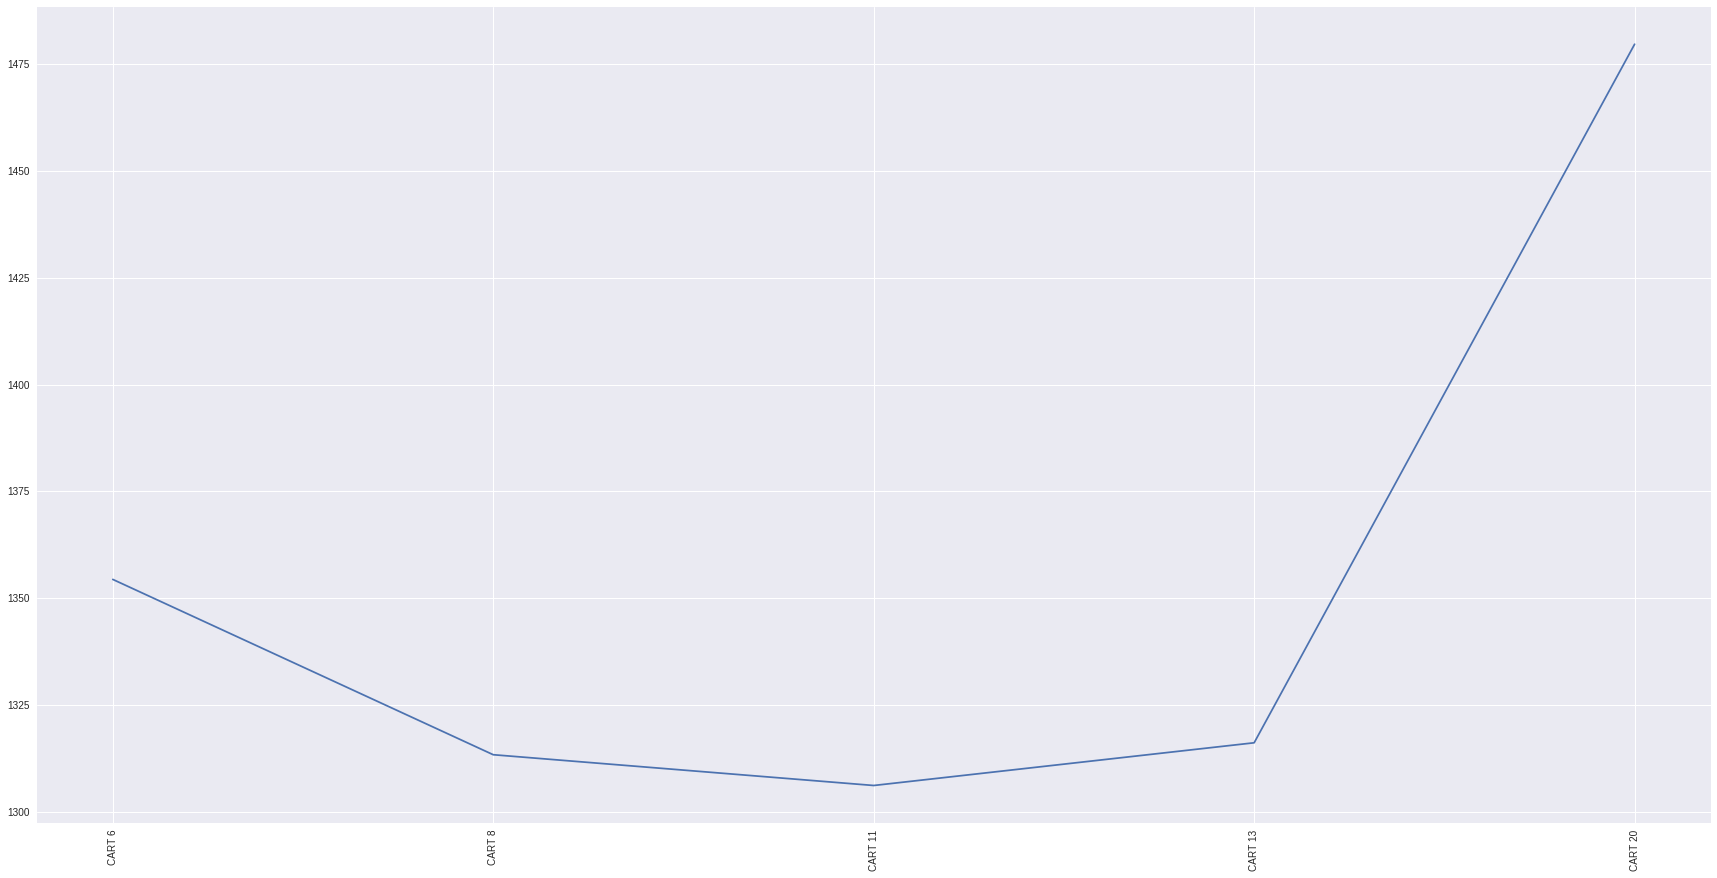

In [0]:
plt.rc("figure", figsize=(30, 15))

#plotting
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')

plt.show()

In [0]:
#Printing the arrays for the values and also for runtime memory time out
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20']


In [0]:
est_values = np.array([10,40,60,70])   

for n_estimators in est_values:
    model = RandomForestRegressor(n_estimators=n_estimators,max_depth=11,random_state=0)
    #took the depth as 11, because in the previous algorithm we get the best at 11
    algo = "RF"
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % n_estimators )

algorithm 1256.2126531636463
algorithm 1249.9423819084473
algorithm 1248.5051887072011
algorithm 1248.5841837017329


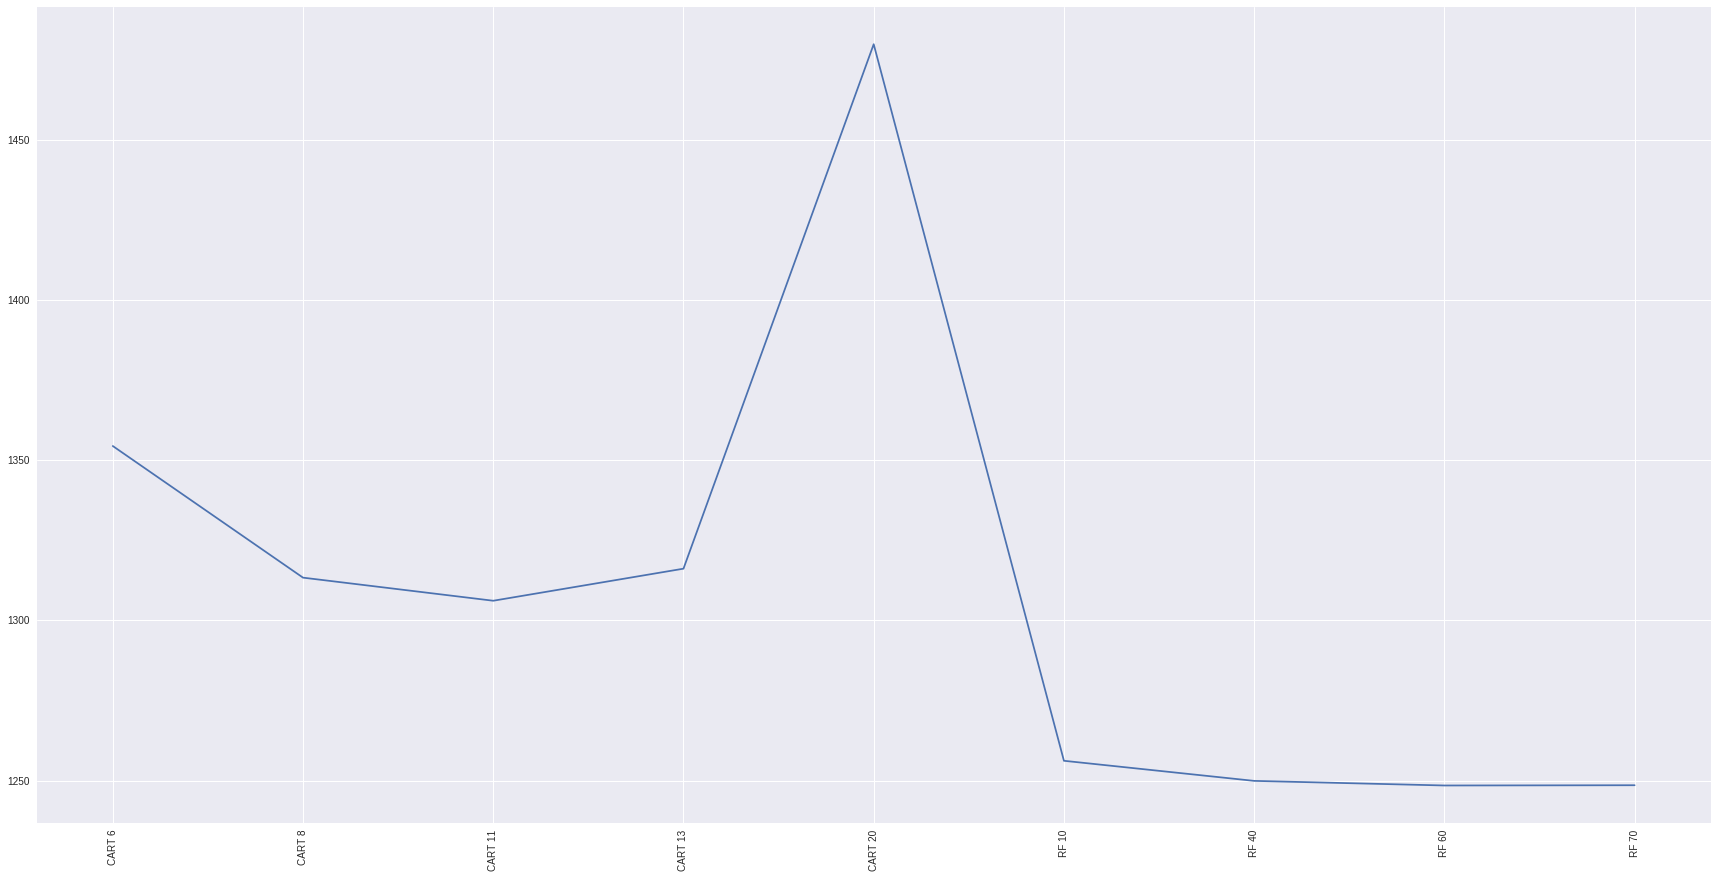

In [0]:
plt.rc("figure", figsize=(30, 15))



#plotting
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')

plt.show()

In [0]:
print(mae)
print(test1)

#the least errors come at RF 60


[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70']


In [0]:
est_list1 = numpy.array([10,40,60,70])

for n_estimators in est_list1:
   model = ExtraTreesRegressor(n_estimators=n_estimators,random_state=seed)
   algo = "ET"
   for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
   test1.append(algo + " %s" % n_estimators )

algorithm 1303.104593880836
algorithm 1267.1417419384256
algorithm 1262.7767371744976
algorithm 1262.523816429244


In [0]:
print(mae)
print(test1)


[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70']


In [0]:
est_list2 = numpy.array([20,40,60])

for n_estimators in est_list2:
    model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
    algo = "Ada"
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % n_estimators )

algorithm 1610.4130194796153
algorithm 1637.7358821369
algorithm 1667.958391013628


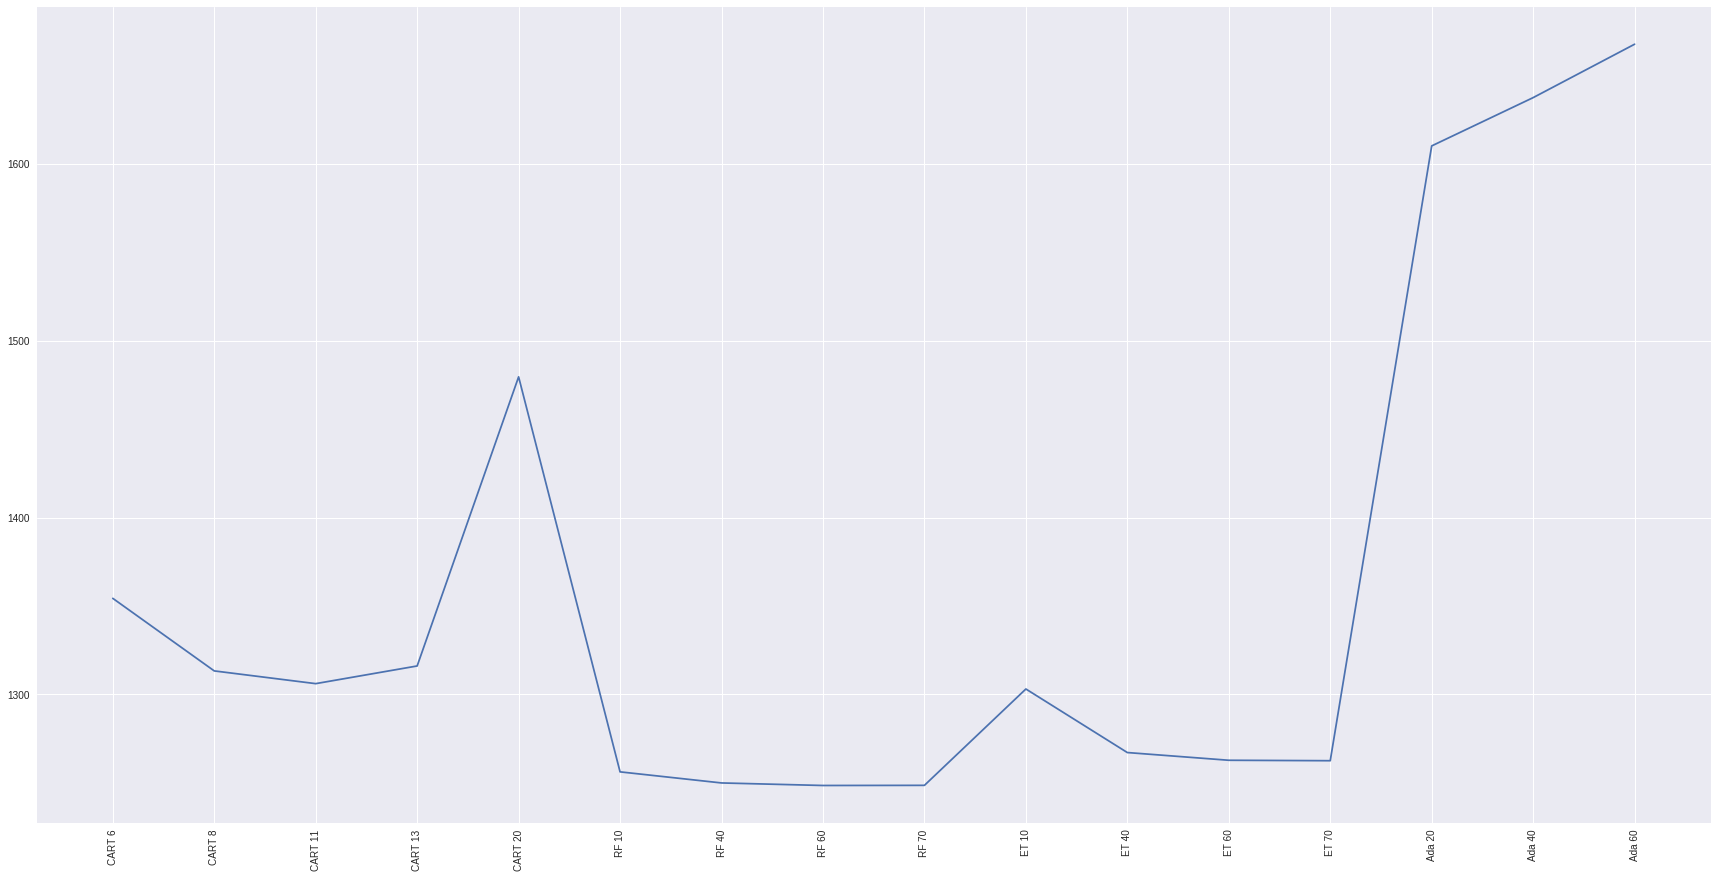

In [0]:
plt.rc("figure", figsize=(30, 15))



#plotting
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')

plt.show()

In [0]:
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60']


algorithm 1351.6809495322098
algorithm 1233.915286391395
algorithm 1218.6034994397937
algorithm 1208.386955102031
algorithm 1201.800663629822


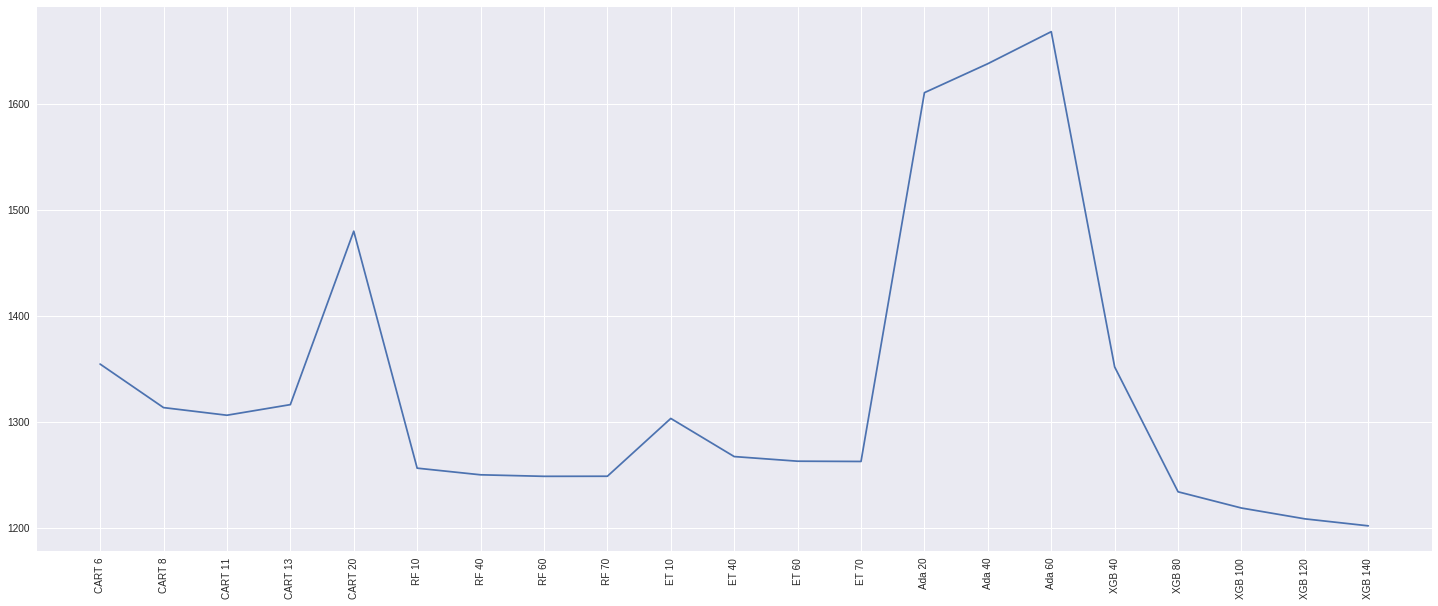

In [0]:


n_list = numpy.array([40,80,100,120,140])

for n_estimators in n_list:
    model = XGBRegressor(n_estimators=n_estimators,seed=seed, max_depth=3, learning_rate=0.1)
    
    algo = "XGB"

    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % n_estimators )
### 
plt.rc("figure", figsize=(25, 10))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()    

In [0]:
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140']


In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

est_list3 = numpy.array([30,50,70])

for n_estimators in est_list3:
    model = BaggingRegressor(n_estimators=n_estimators)
    
    algo = "Bag"
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % n_estimators )

algorithm 1223.4330965439017
algorithm 1215.6892971622685
algorithm 1211.6397327360805


In [0]:
print(mae)
print(test1)



[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822, 1223.4330965439017, 1215.6892971622685, 1211.6397327360805]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140', 'Bag 30', 'Bag 50', 'Bag 70']


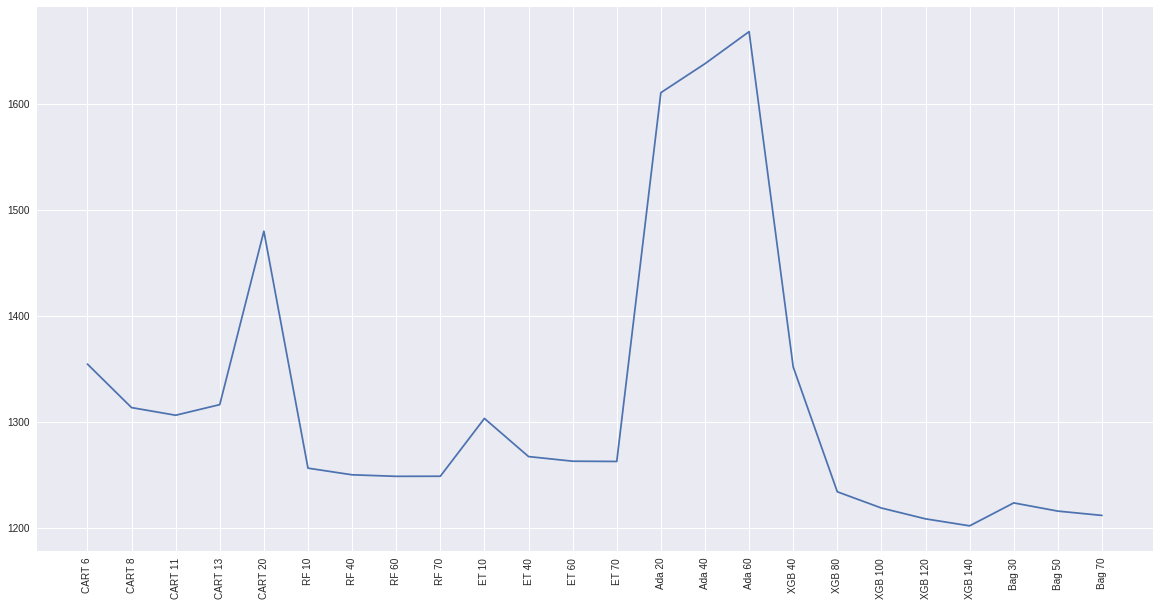

In [0]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(20, 10))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()  

In [0]:
import numpy
#0.01, 0.001, 0.002,0.1,0.0002
alphas = numpy.array([0.0002])

for alpha in alphas:
    model = Lasso(alpha=alpha,random_state=seed)
    
    algo = "Lasso"

    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % alpha )


algorithm 1255.8840521978225


In [0]:
print(mae) 
print(test1) 

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822, 1223.4330965439017, 1215.6892971622685, 1211.6397327360805, 1259.654225142881, 1342.3982574320194, 1263.0869391712788, 1678.0645857137083, 1255.8840521978225]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140', 'Bag 30', 'Bag 50', 'Bag 70', 'Lasso 0.001', 'Lasso 0.01', 'Lasso 0.002', 'Lasso 0.1', 'Lasso 0.0002']


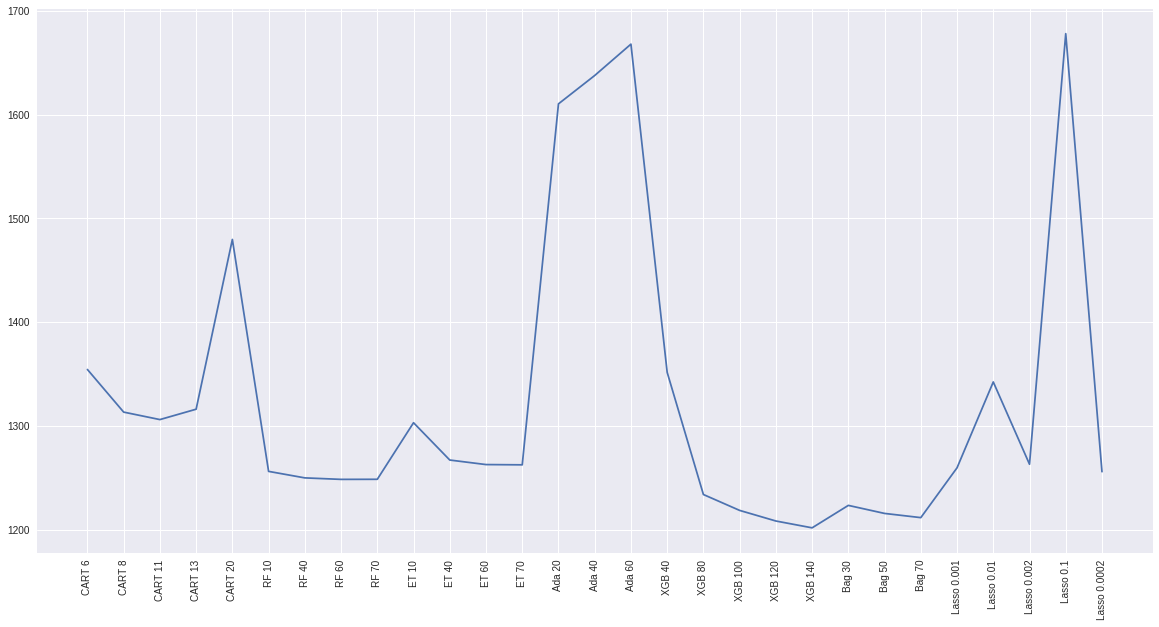

In [0]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(20, 10))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()  

In [1]:

#runn after lasso #time taking
n_list = numpy.array([20])

for n_neighbors in n_list:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    algo = "KNN"
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % n_neighbors )

    



algorithm 1416.0481668239972


In [0]:
mae1=[]
test2=[]
import numpy
#0.01, 0.001, 0.002,0.1,0.0002
alphas = numpy.array([0.0002,0.001,0.002,0.01,0.1])

for alpha in alphas:
    model = Lasso(alpha=alpha,random_state=seed)
    
    algo = "Lasso"

    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae1.append(result)
        print(name + " %s" % result)
        
    test2.append(algo + " %s" % alpha )
    
    print("The alpha is ", alpha)
    coeffs = model.coef_ 
    print("The coeff are", coeffs)

algorithm 1255.8840521978225
The alpha is  0.0002
The coeff are [ 9.45709099e-02 -1.49555539e-14 -3.21404583e-01 ...  2.28118355e-01
  0.00000000e+00  1.26272919e-01]
algorithm 1259.654225142881
The alpha is  0.001
The coeff are [ 9.97475866e-02 -3.29685169e-14 -2.65267171e-01 ...  1.25801066e-01
  0.00000000e+00  1.23867235e-01]
algorithm 1263.0869391712788
The alpha is  0.002
The coeff are [ 1.06112733e-01 -2.67783197e-14 -2.26759014e-01 ...  9.59307504e-02
 -0.00000000e+00  1.09942881e-01]
algorithm 1342.3982574320194
The alpha is  0.01
The coeff are [ 1.43585967e-01 -6.16955649e-14 -1.25978198e-01 ...  6.79433634e-02
  0.00000000e+00  0.00000000e+00]
algorithm 1678.0645857137083
The alpha is  0.1
The coeff are [ 0. -0. -0. ...  0.  0.  0.]


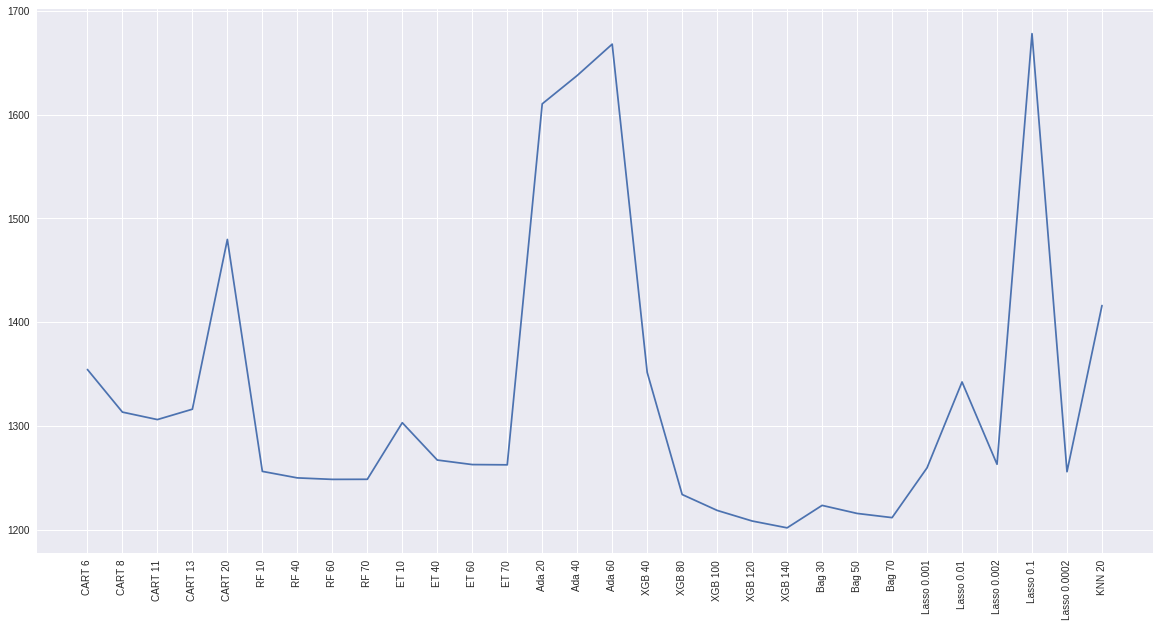

In [4]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(20, 10))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()  

In [6]:
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822, 1223.4330965439017, 1215.6892971622685, 1211.6397327360805, 1259.654225142881, 1342.3982574320194, 1263.0869391712788, 1678.0645857137083, 1255.8840521978225, 1416.0481668239972]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140', 'Bag 30', 'Bag 50', 'Bag 70', 'Lasso 0.001', 'Lasso 0.01', 'Lasso 0.002', 'Lasso 0.1', 'Lasso 0.0002', 'KNN 20']


In [17]:
from sklearn.linear_model import Ridge
alphas = numpy.array([0.001,0.002,0.0002,0.1])

for alpha in alphas:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % alpha )


algorithm 1263.1763229098608
algorithm 1263.1559443616122
algorithm 1263.1928536707758
algorithm 1261.862926155156


In [18]:
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822, 1223.4330965439017, 1215.6892971622685, 1211.6397327360805, 1259.654225142881, 1342.3982574320194, 1263.0869391712788, 1678.0645857137083, 1255.8840521978225, 1416.0481668239972, 1263.1763229098608, 1263.1559443616122, 1263.1928536707758, 1261.862926155156]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140', 'Bag 30', 'Bag 50', 'Bag 70', 'Lasso 0.001', 'Lasso 0.01', 'Lasso 0.002', 'Lasso 0.1', 'Lasso 0.0002', 'KNN 20', 'Ridge 0

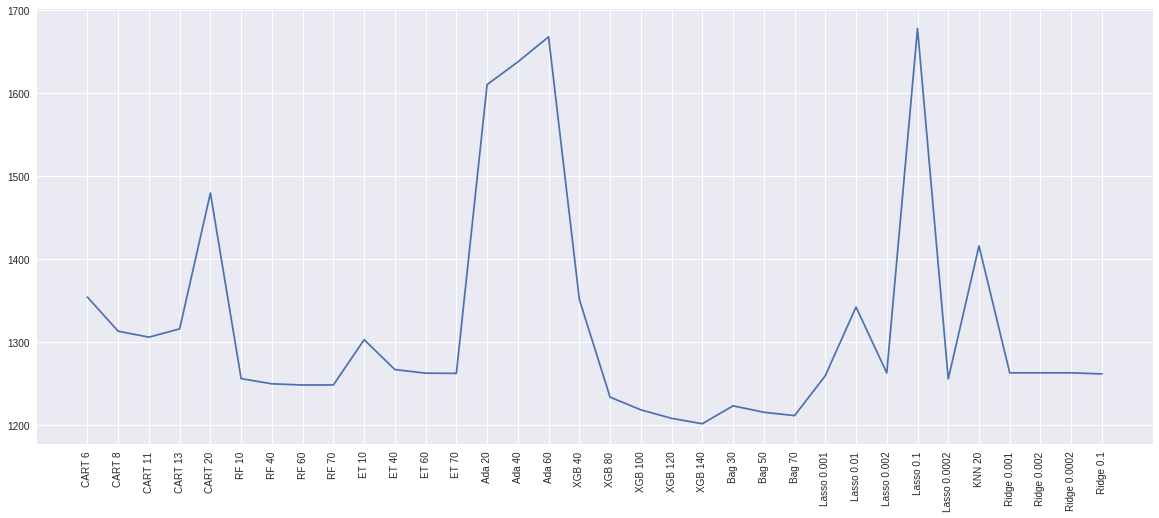

In [19]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(20, 8))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()  

In [21]:
from sklearn.linear_model import ElasticNet

alphas3 = numpy.array([0.001,0.002,0.0002,0.1])

for alpha in alphas3:
    model = ElasticNet(alpha=alpha,random_state=seed)
    
    algo = "Elastic"

   
    for name,i_cols_list in cols_X:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    test1.append(algo + " %s" % alpha )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


algorithm 1257.7586455430835
algorithm 1259.9282362557178
algorithm 1255.2000496181272
algorithm 1555.4363703322706


In [22]:
print(mae)
print(test1)

[1354.3960526603398, 1313.3373401268277, 1306.1346644547866, 1316.1356552183163, 1479.7337504364655, 1256.2126531636463, 1249.9423819084473, 1248.5051887072011, 1248.5841837017329, 1303.104593880836, 1267.1417419384256, 1262.7767371744976, 1262.523816429244, 1610.4130194796153, 1637.7358821369, 1667.958391013628, 1351.6809495322098, 1233.915286391395, 1218.6034994397937, 1208.386955102031, 1201.800663629822, 1223.4330965439017, 1215.6892971622685, 1211.6397327360805, 1259.654225142881, 1342.3982574320194, 1263.0869391712788, 1678.0645857137083, 1255.8840521978225, 1416.0481668239972, 1263.1763229098608, 1263.1559443616122, 1263.1928536707758, 1261.862926155156, 1257.7586455430835, 1259.9282362557178, 1255.2000496181272, 1555.4363703322706]
['CART 6', 'CART 8', 'CART 11', 'CART 13', 'CART 20', 'RF 10', 'RF 40', 'RF 60', 'RF 70', 'ET 10', 'ET 40', 'ET 60', 'ET 70', 'Ada 20', 'Ada 40', 'Ada 60', 'XGB 40', 'XGB 80', 'XGB 100', 'XGB 120', 'XGB 140', 'Bag 30', 'Bag 50', 'Bag 70', 'Lasso 0.00

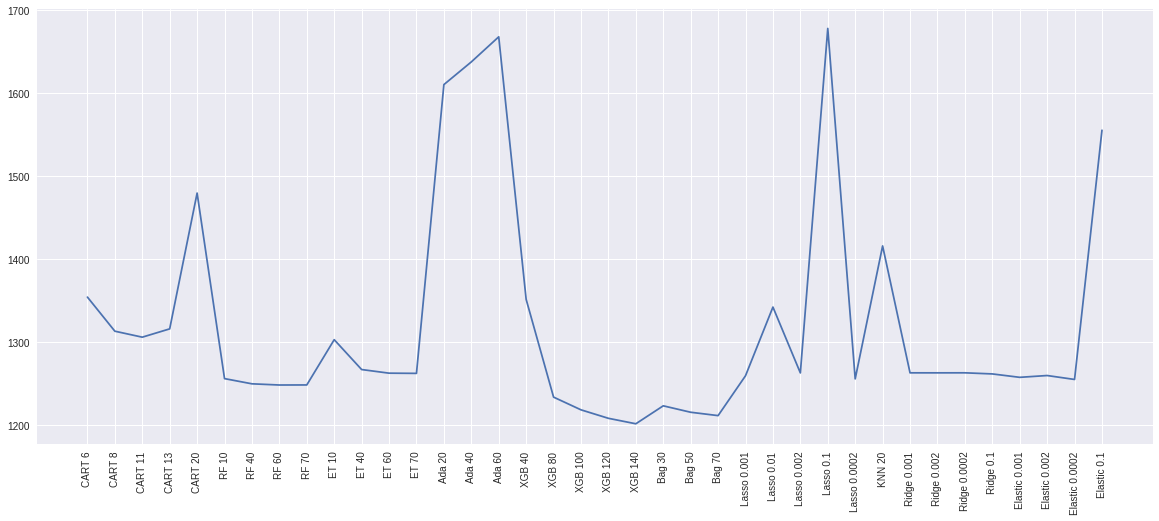

In [23]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(20, 8))
fig, ax = plt.subplots()
plt.plot(mae)
ax.set_xticks(range(len(test1)))
ax.set_xticklabels(test1,rotation='vertical')
plt.show()  